In [1]:
#Importing libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#Importing data
data = pd.read_csv('NC_PM10_2019.csv')

#Checking out data
data.head()

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,06/29/2019,AQS,370030005,3,14,ug/m3 SC,13,Taylorsville Liledoun,1,100.0,81102,PM10 Total 0-10um STP,25860.0,"Hickory-Lenoir-Morganton, NC",37,North Carolina,3,Alexander,35.9138,-81.191
1,06/30/2019,AQS,370030005,3,14,ug/m3 SC,13,Taylorsville Liledoun,1,100.0,81102,PM10 Total 0-10um STP,25860.0,"Hickory-Lenoir-Morganton, NC",37,North Carolina,3,Alexander,35.9138,-81.191
2,07/01/2019,AQS,370030005,3,14,ug/m3 SC,13,Taylorsville Liledoun,1,100.0,81102,PM10 Total 0-10um STP,25860.0,"Hickory-Lenoir-Morganton, NC",37,North Carolina,3,Alexander,35.9138,-81.191
3,07/02/2019,AQS,370030005,3,12,ug/m3 SC,11,Taylorsville Liledoun,1,100.0,81102,PM10 Total 0-10um STP,25860.0,"Hickory-Lenoir-Morganton, NC",37,North Carolina,3,Alexander,35.9138,-81.191
4,07/03/2019,AQS,370030005,3,9,ug/m3 SC,8,Taylorsville Liledoun,1,100.0,81102,PM10 Total 0-10um STP,25860.0,"Hickory-Lenoir-Morganton, NC",37,North Carolina,3,Alexander,35.9138,-81.191


In [3]:
#Grouping by site name and location to get yearly average
grouped_df = data.groupby(['COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'], as_index=False)['Daily Mean PM10 Concentration'].mean()

#Checking new df
grouped_df.head()


,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Daily Mean PM10 Concentration
0,Alexander,35.913800,-81.191000,10.397727
1,Cumberland,35.041416,-78.953112,13.329480
2,Durham,36.032955,-78.904037,12.198324
3,Forsyth,36.110693,-80.226438,13.926761
4,Guilford,36.109006,-79.802314,14.501393


In [4]:
#Defining map data file path
nc_map_fp = 'CountyBoundary_SHP 2/BoundaryCountyPolygon.shp'

#Reading file
nc_map_data = gpd.read_file(nc_map_fp)

nc_map_data.head()

,FIPS,CountyName,UpperCount,SapCountyI,DOTDistric,DOTDivisio,SAP_CNTY_N,CNTY_NBR,DSTRCT_NBR,DIV_NBR,NAME,Shape_Leng,Shape_Area,geometry
0,29,Camden,CAMDEN,015,1,1,15,14,1,1,Camden,680450.731781,8.650426e+09,"POLYGON ((2913995.553 864401.707, 2913895.042 ..."
1,73,Gates,GATES,037,1,1,37,36,1,1,Gates,444604.369559,9.640705e+09,"POLYGON ((2678789.043 934597.313, 2678741.557 ..."
2,97,Iredell,IREDELL,049,3,12,49,48,3,12,Iredell,639632.141435,1.667062e+10,"POLYGON ((1420151.569 639374.887, 1420082.675 ..."
3,193,Wilkes,WILKES,097,2,11,97,96,2,11,Wilkes,718209.059123,2.111175e+10,"POLYGON ((1319004.883 828579.516, 1318921.263 ..."
4,179,Union,UNION,090,3,10,90,89,3,10,Union,584449.934640,1.782795e+10,"POLYGON ((1536924.570 534391.626, 1537009.088 ..."


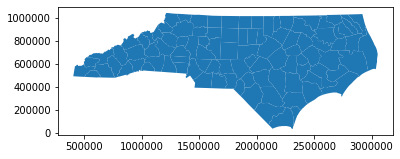

In [5]:
#Checking mapping data
nc_map_data.plot()

In [6]:
#merging data with map
merged_info = nc_map_data.set_index('CountyName').join(grouped_df.set_index('COUNTY'), how='left')
merged_info.head()

,FIPS,UpperCount,SapCountyI,DOTDistric,DOTDivisio,SAP_CNTY_N,CNTY_NBR,DSTRCT_NBR,DIV_NBR,NAME,Shape_Leng,Shape_Area,geometry,SITE_LATITUDE,SITE_LONGITUDE,Daily Mean PM10 Concentration
Alamance,1,ALAMANCE,001,3,7,1,0,3,7,Alamance,476690.857703,1.210719e+10,"POLYGON ((1923605.182 881799.472, 1923342.027 ...",NaN,NaN,NaN
Alexander,3,ALEXANDER,002,3,12,2,1,3,12,Alexander,387342.312839,7.343464e+09,"POLYGON ((1374327.813 744224.794, 1374263.717 ...",35.9138,-81.191,10.397727
Alleghany,5,ALLEGHANY,003,1,11,3,2,1,11,Alleghany,439166.717185,6.576362e+09,"POLYGON ((1336458.513 959890.137, 1336579.904 ...",NaN,NaN,NaN
Anson,7,ANSON,004,3,10,4,3,3,10,Anson,575503.754583,1.497020e+10,"POLYGON ((1618559.891 528612.782, 1618623.896 ...",NaN,NaN,NaN
Ashe,9,ASHE,005,2,11,5,4,2,11,Ashe,520045.398397,1.193919e+10,"POLYGON ((1269410.489 915476.459, 1266824.424 ...",NaN,NaN,NaN


In [7]:
#Filling NaN with zero so entire map is made
merged_info=merged_info.fillna(0)

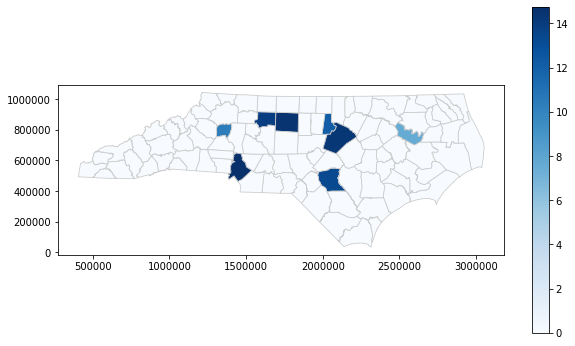

In [11]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Daily Mean PM10 Concentration'
geom = 'geometry'
# set the range for the choropleth
max_pm = merged_info['Daily Mean PM10 Concentration'].max()
min_pm = merged_info['Daily Mean PM10 Concentration'].min()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min_pm, vmax=max_pm))
cbar = fig.colorbar(sm)
merged_info.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')